In [ ]:
from google.colab import files
import numpy as np

In [ ]:
# Upload the French dataset
uploaded_french = files.upload()

# Access the filename (fra.txt)
french_filename = list(uploaded_french.keys())[0]

# Read into DataFrame
import pandas as pd

# Read the file with no headers
french_df = pd.read_csv("fra.txt", sep="\t", header=None)

# Keep only the first two columns: English & French
french_df = french_df[[0, 1]]
french_df.columns = ["English", "French"]

french_df.head()

Saving fra.txt to fra.txt


,English,French
0,Go.,Va !
1,Go.,Marche.
2,Go.,En route !
3,Go.,Bouge !
4,Hi.,Salut !


In [ ]:
# Upload the Hindi dataset
uploaded_hindi = files.upload()

# Access the filename (fra.txt)
hindi_filename = list(uploaded_hindi.keys())[0]

# Read into DataFrame
import pandas as pd

# Read the file with no headers
hindi_df = pd.read_csv("hin.txt", sep="\t", header=None)

# Keep only the first two columns: English & French
hindi_df = hindi_df[[0, 1]]
hindi_df.columns = ["English", "Hindi"]

hindi_df.head()

Saving hin.txt to hin.txt


,English,Hindi
0,Wow!,वाह!
1,Duck!,झुको!
2,Duck!,बतख़!
3,Help!,बचाओ!
4,Jump.,उछलो.


## Preprocessing The Data

In [ ]:
import re

def clean_sentence(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"[^a-zA-Z0-9\s]", "", sentence)
  return sentence.strip()

def clean_hindi(sentence):
  sentence = sentence.strip()
  return sentence

french_df["English"]= french_df["English"].apply(clean_sentence)
french_df["French"]= french_df["French"].apply(clean_sentence)

hindi_df["English"]= hindi_df["English"].apply(clean_sentence)
hindi_df["Hindi"]= hindi_df["Hindi"].apply(clean_hindi)

len(french_df), len(hindi_df)

(237838, 3116)

In [ ]:
french_df = french_df[:5000]
hindi_df = hindi_df[:5000]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# French model tokenizer
eng_tokenizer_fr = Tokenizer()
fr_tokenizer = Tokenizer()

eng_tokenizer_fr.fit_on_texts(french_df["English"]) #fit_on_texts assigns each word a no. like hello= 1, bye= 2 etc etc
fr_tokenizer.fit_on_texts(french_df["French"])

# Convert sentences to sequences = so for a word, every time it'll be used in a sentence, throughout the dataset, it'll be in that integer form, that we got from fit_on_texts
eng_seq_fr = eng_tokenizer_fr.texts_to_sequences(french_df["English"])
fr_seq = fr_tokenizer.texts_to_sequences(french_df["French"])

# Set max length
max_len_eng = max([len(seq) for seq in eng_seq_fr])
max_len_fr = max([len(seq) for seq in fr_seq])

# Pad sequence
eng_seq_fr = pad_sequences(eng_seq_fr, maxlen= max_len_eng, padding="post")
fr_seq= pad_sequences(fr_seq, maxlen= max_len_fr, padding="post")


# Hindi model tokenizer
eng_tokenizer_hi = Tokenizer()
hi_tokenizer = Tokenizer()

eng_tokenizer_hi.fit_on_texts(hindi_df["English"]) #fit_on_texts assigns each word a no. like hello= 1, bye= 2 etc etc
hi_tokenizer.fit_on_texts(hindi_df["Hindi"])

# Convert sentences to sequences = so for a word, every time it'll be used in a sentence, throughout the dataset, it'll be in that integer form, that we got from fit_on_texts
eng_seq_hi = eng_tokenizer_hi.texts_to_sequences(hindi_df["English"])
hi_seq = hi_tokenizer.texts_to_sequences(hindi_df["Hindi"])

# Set max length
max_len_eng = max([len(seq) for seq in eng_seq_hi])
max_len_hi = max([len(seq) for seq in hi_seq])

# Pad sequence
eng_seq_hi = pad_sequences(eng_seq_hi, maxlen= max_len_eng, padding="post")
hi_seq= pad_sequences(hi_seq, maxlen= max_len_hi, padding="post")

In [ ]:
vocab_size_eng_fr = len(eng_tokenizer_fr.word_index) + 1
vocab_size_fr = len(fr_tokenizer.word_index) + 1

In [ ]:
fr_seq = np.expand_dims(fr_seq, -1) #converting output from 2D to 3D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, RepeatVector, TimeDistributed

In [ ]:
model_fr = Sequential()
model_fr.add(Embedding(input_dim=vocab_size_eng_fr, output_dim=256, input_length=max_len_eng))
model_fr.add(LSTM(256))
model_fr.add(RepeatVector(max_len_fr))
model_fr.add(LSTM(256, return_sequences=True))
model_fr.add(TimeDistributed(Dense(vocab_size_fr, activation='softmax')))
model_fr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history_fr = model_fr.fit(
    eng_seq_fr,
    fr_seq,
    epochs=5,            # you can change to 10–30
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
 3/63 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.7551 - loss: 5.3035

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history_fr.history['accuracy'], label= "Training Accuracy")
plt.plot(history_fr.history['val_accuracy'], label= "Validation Accuracy")
plt.legend()
plt.title("Model Accuracy (English -> French)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

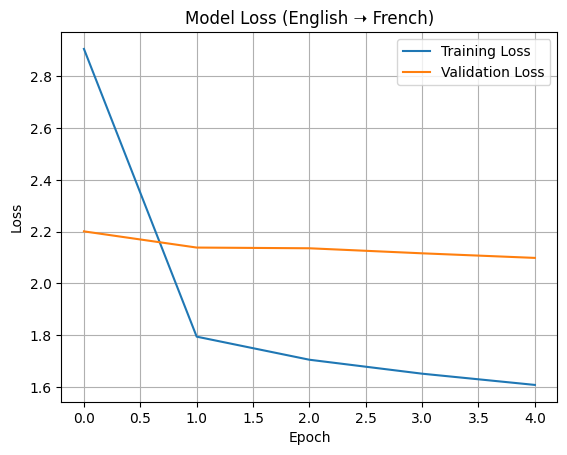

In [ ]:
# Plot Loss
plt.plot(history_fr.history['loss'], label='Training Loss')
plt.plot(history_fr.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (English ➝ French)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
vocab_size_eng_hi = len(eng_tokenizer_hi.word_index) + 1
vocab_size_hi = len(hi_tokenizer.word_index) + 1

In [ ]:
model_hi = Sequential()

model_hi.add(Embedding(input_dim=vocab_size_eng_hi, output_dim=256))
model_hi.add(LSTM(256))
model_hi.add(RepeatVector(max_len_hi))
model_hi.add(LSTM(256, return_sequences=True))
model_hi.add(TimeDistributed(Dense(vocab_size_hi, activation='softmax')))

model_hi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_hi.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_hi = model_hi.fit(
    eng_seq_hi,       # English padded input (for Hindi dataset)
    hi_seq,           # Hindi padded output (target)
    epochs=30,        # Start with 5–10 if you want a quick test
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 35s 750ms/step - accuracy: 0.6780 - loss: 4.6743 - val_accuracy: 0.5962 - val_loss: 3.3011
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 28s 713ms/step - accuracy: 0.7552 - loss: 1.8693 - val_accuracy: 0.5962 - val_loss: 3.1350
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 713ms/step - accuracy: 0.7576 - loss: 1.7150 - val_accuracy: 0.5988 - val_loss: 3.1348
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 43s 766ms/step - accuracy: 0.7600 - loss: 1.6762 - val_accuracy: 0.5992 - val_loss: 3.0928
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 38s 698ms/step - accuracy: 0.7625 - loss: 1.6370 - val_accuracy: 0.5992 - val_loss: 3.0862
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 712ms/step - accuracy: 0.7611 - loss: 1.6268 - val_accuracy: 0.5992 - val_loss: 3.2352
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 718ms/step - accuracy: 0.7592 - loss: 1.6331 - val_accuracy: 0.5992 - val_loss: 3.1445
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 28s 714ms/step - accuracy: 0.7639 - loss: 1.5917 - val_accu

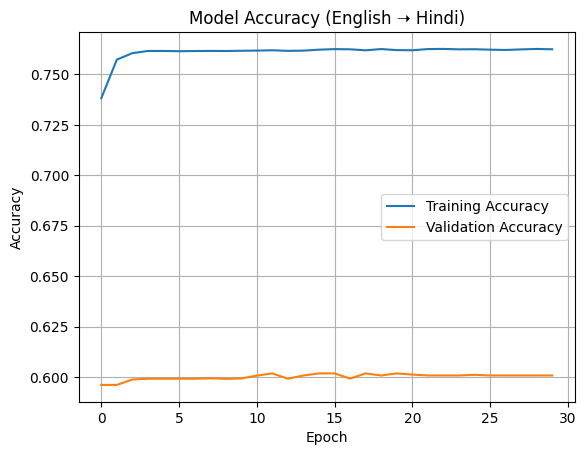

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_hi.history['accuracy'], label='Training Accuracy')
plt.plot(history_hi.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (English ➝ Hindi)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

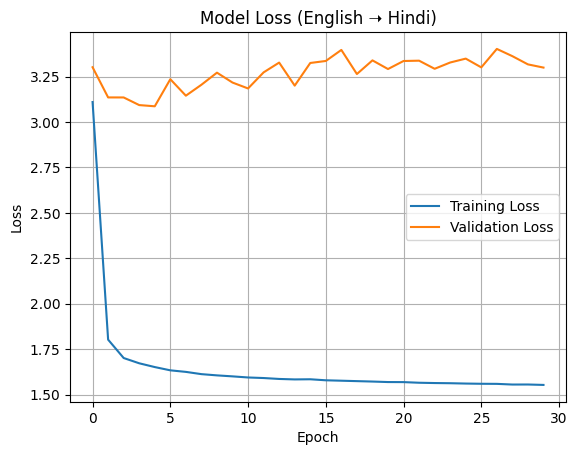

In [ ]:
# Plot loss
plt.plot(history_hi.history['loss'], label='Training Loss')
plt.plot(history_hi.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (English ➝ Hindi)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save models
model_fr.save("/content/drive/MyDrive/2B_DualLanguageTranslator/saved_models/english_to_french_model.h5")
model_hi.save("/content/drive/MyDrive/2B_DualLanguageTranslator/saved_models/english_to_hindi_model.h5")

import pickle
# Save tokenizers
with open("/content/drive/MyDrive/2B_DualLanguageTranslator/saved_models/eng_tokenizer_fr.pkl", "wb") as f:
    pickle.dump(eng_tokenizer_fr, f)

with open("/content/drive/MyDrive/2B_DualLanguageTranslator/saved_models/fr_tokenizer.pkl", "wb") as f:
    pickle.dump(fr_tokenizer, f)

with open("/content/drive/MyDrive/2B_DualLanguageTranslator/saved_models/eng_tokenizer_hi.pkl", "wb") as f:
    pickle.dump(eng_tokenizer_hi, f)

with open("/content/drive/MyDrive/2B_DualLanguageTranslator/saved_models/hi_tokenizer.pkl", "wb") as f:
    pickle.dump(hi_tokenizer, f)